<a href="https://colab.research.google.com/github/Huy987asd/BT/blob/main/DC_AC_motor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

150.00000000000003


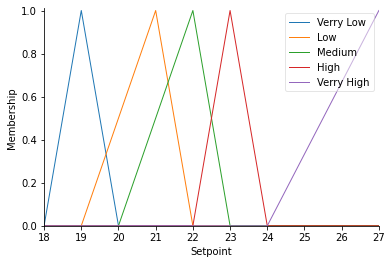

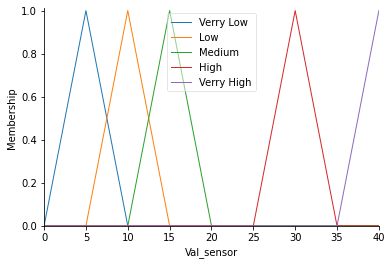

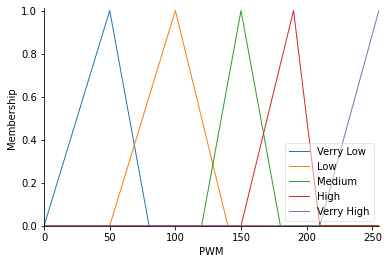

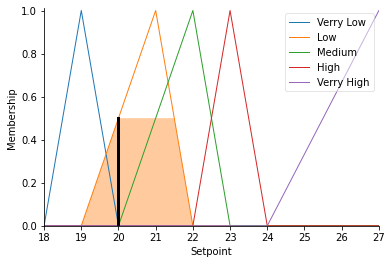

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18, 28, 1), 'Setpoint')
Val_sensor = ctrl.Antecedent(np.arange(0, 41, 1), 'Val_sensor')
PWM = ctrl.Consequent(np.arange(0, 256, 1), 'PWM')

Setpoint['Verry Low'] = fuzz.trimf(Setpoint.universe,[18,19,20])
Setpoint['Low'] = fuzz.trimf(Setpoint.universe,[19,21,22])
Setpoint['Medium'] = fuzz.trimf(Setpoint.universe,[20,22,23])
Setpoint['High'] = fuzz.trimf(Setpoint.universe,[22,23,24])
Setpoint['Verry High'] = fuzz.trimf(Setpoint.universe,[24,27,27])
Val_sensor['Verry Low'] = fuzz.trimf(Val_sensor.universe,[0,5,10])
Val_sensor['Low'] = fuzz.trimf(Val_sensor.universe,[5,10,15])
Val_sensor['Medium'] = fuzz.trimf(Val_sensor.universe,[10,15,20])
Val_sensor['High'] = fuzz.trimf(Val_sensor.universe,[25,30,35])
Val_sensor['Verry High'] = fuzz.trimf(Val_sensor.universe,[35,40,40])
PWM['Verry Low'] = fuzz.trimf(PWM.universe,[0,50,80])
PWM['Low'] = fuzz.trimf(PWM.universe,[50,100,140])
PWM['Medium'] = fuzz.trimf(PWM.universe,[120,150,180])
PWM['High'] = fuzz.trimf(PWM.universe,[150,190,210])
PWM['Verry High'] = fuzz.trimf(PWM.universe,[210,255,255])
Setpoint.view()
Val_sensor.view()
PWM.view()

rule1 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule2 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Low'], PWM['Verry Low'])
rule3 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Medium'], PWM['Low'])
rule4 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['High'], PWM['Medium'])
rule5 = ctrl.Rule(Setpoint['Verry Low']& Val_sensor['Verry High'], PWM['Medium'])
rule6 = ctrl.Rule(Setpoint['Low']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule7 = ctrl.Rule(Setpoint['Low']& Val_sensor['Low'], PWM['Low'])
rule8 = ctrl.Rule(Setpoint['Low']& Val_sensor['Medium'], PWM['Low'])
rule9 = ctrl.Rule(Setpoint['Low']& Val_sensor['High'], PWM['Medium'])
rule10 = ctrl.Rule(Setpoint['Low']& Val_sensor['Verry High'], PWM['High'])
rule11 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Verry Low'], PWM['Verry Low'])
rule12 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Low'], PWM['Low'])
rule13 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Medium'], PWM['Medium'])
rule14 = ctrl.Rule(Setpoint['Medium']& Val_sensor['High'], PWM['Medium'])
rule15 = ctrl.Rule(Setpoint['Medium']& Val_sensor['Verry High'], PWM['High'])
rule16 = ctrl.Rule(Setpoint['High']& Val_sensor['Verry Low'], PWM['Low'])
rule17 = ctrl.Rule(Setpoint['High']& Val_sensor['Low'], PWM['Medium'])
rule18 = ctrl.Rule(Setpoint['High']& Val_sensor['Medium'], PWM['Medium'])
rule19 = ctrl.Rule(Setpoint['High']& Val_sensor['High'], PWM['High'])
rule20 = ctrl.Rule(Setpoint['High']& Val_sensor['Verry High'], PWM['High'])
rule21 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Verry Low'], PWM['Medium'])
rule22 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Low'], PWM['Medium'])
rule23 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Medium'], PWM['High'])
rule24 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['High'], PWM['High'])
rule25 = ctrl.Rule(Setpoint['Verry High']& Val_sensor['Verry High'], PWM['Verry High'])
PWMS_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
PWMS = ctrl.ControlSystemSimulation(PWMS_ctrl)
PWMS.input['Setpoint'] = 20
PWMS.input['Val_sensor'] = 30

PWMS.compute()
print(PWMS.output['PWM'])
Setpoint.view(sim = PWMS)





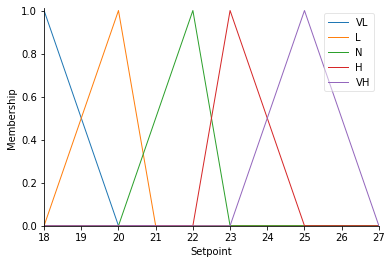

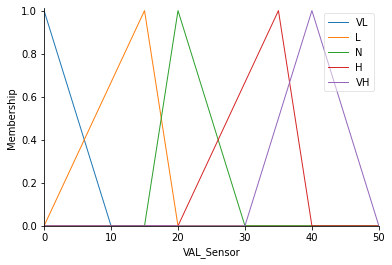

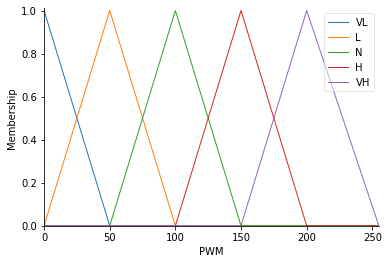

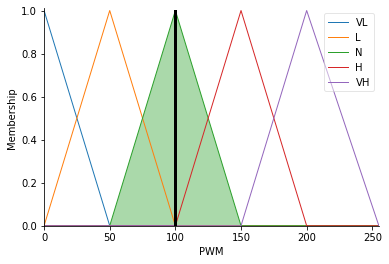

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18,28,1),'Setpoint')
VAL_Sensor = ctrl.Antecedent(np.arange(0,51,1),'VAL_Sensor')
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')

Setpoint['VL'] = fuzz.trimf(Setpoint.universe,[18,18,20])
Setpoint['L'] = fuzz.trimf(Setpoint.universe,[18,20,21])
Setpoint['N'] = fuzz.trimf(Setpoint.universe,[20,22,23])
Setpoint['H'] = fuzz.trimf(Setpoint.universe,[22,23,25])
Setpoint['VH'] = fuzz.trimf(Setpoint.universe,[23,25,27])
Setpoint.view()

VAL_Sensor['VL'] = fuzz.trimf(VAL_Sensor.universe,[0,0,10])
VAL_Sensor['L'] = fuzz.trimf(VAL_Sensor.universe,[0,15,20])
VAL_Sensor['N'] = fuzz.trimf(VAL_Sensor.universe,[15,20,30])
VAL_Sensor['H'] = fuzz.trimf(VAL_Sensor.universe,[20,35,40])
VAL_Sensor['VH'] = fuzz.trimf(VAL_Sensor.universe,[30,40,50])
VAL_Sensor.view()

PWM['VL'] = fuzz.trimf(PWM.universe,[0,0,50])
PWM['L'] = fuzz.trimf(PWM.universe,[0,50,100])
PWM['N'] = fuzz.trimf(PWM.universe,[50,100,150])
PWM['H'] = fuzz.trimf(PWM.universe,[100,150,200])
PWM['VH'] = fuzz.trimf(PWM.universe,[150,200,255])
PWM.view()

rule1 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['VL'], PWM['VL'])
rule2 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['VL'], PWM['VL'])
rule3 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['VL'], PWM['L'])
rule4 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['VL'], PWM['N'])
rule5 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['VL'], PWM['H'])

rule6 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['L'], PWM['VL'])
rule7 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['L'], PWM['L'])
rule8 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['L'], PWM['L'])
rule9 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['L'], PWM['N'])
rule10 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['L'], PWM['H'])

rule11 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['N'], PWM['L'])
rule12 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['N'], PWM['L'])
rule13 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['N'], PWM['N'])
rule14 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['N'], PWM['H'])
rule15 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['N'], PWM['VH'])

rule16 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['H'], PWM['L'])
rule17 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['H'], PWM['N'])
rule18 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['H'], PWM['H'])
rule19 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['H'], PWM['H'])
rule20 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['H'], PWM['VH'])

rule21 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['VH'], PWM['N'])
rule22 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['VH'], PWM['N'])
rule23 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['VH'], PWM['H'])
rule24 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['VH'], PWM['VH'])
rule25 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['VH'], PWM['VH'])

Result_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                  rule6,rule7,rule8,rule9,rule10,
                                  rule11,rule12,rule13,rule14,rule15,
                                  rule16,rule17,rule18,rule19,rule20,
                                  rule21,rule22,rule23,rule24,rule25])
Result = ctrl.ControlSystemSimulation(Result_ctrl)
Result.input['Setpoint'] = 10
Result.input['VAL_Sensor'] = 40
Result.compute()
PWM.view(sim = Result)

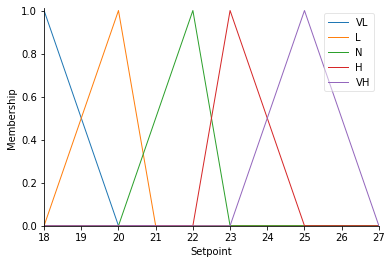

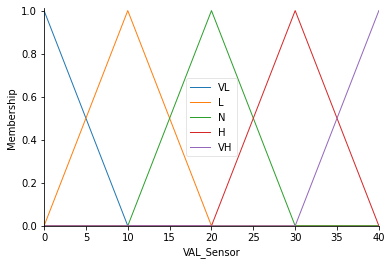

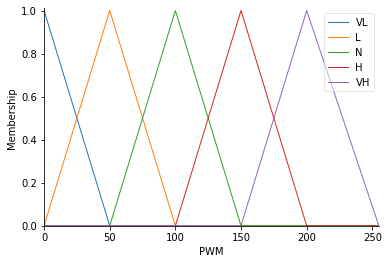

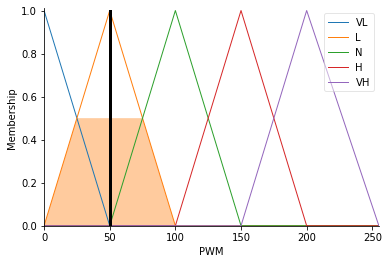

In [5]:

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Setpoint = ctrl.Antecedent(np.arange(18,28,1),'Setpoint')
VAL_Sensor = ctrl.Antecedent(np.arange(0,41,1),'VAL_Sensor')
PWM = ctrl.Consequent(np.arange(0,256,1),'PWM')

Setpoint['VL'] = fuzz.trimf(Setpoint.universe,[18,18,20])
Setpoint['L'] = fuzz.trimf(Setpoint.universe,[18,20,21])
Setpoint['N'] = fuzz.trimf(Setpoint.universe,[20,22,23])
Setpoint['H'] = fuzz.trimf(Setpoint.universe,[22,23,25])
Setpoint['VH'] = fuzz.trimf(Setpoint.universe,[23,25,27])
Setpoint.view()

VAL_Sensor['VL'] = fuzz.trimf(VAL_Sensor.universe,[0,0,10])
VAL_Sensor['L'] = fuzz.trimf(VAL_Sensor.universe,[0,10,20])
VAL_Sensor['N'] = fuzz.trimf(VAL_Sensor.universe,[10,20,30])
VAL_Sensor['H'] = fuzz.trimf(VAL_Sensor.universe,[20,30,40])
VAL_Sensor['VH'] = fuzz.trimf(VAL_Sensor.universe,[30,40,40])
VAL_Sensor.view()

PWM['VL'] = fuzz.trimf(PWM.universe,[0,0,50])
PWM['L'] = fuzz.trimf(PWM.universe,[0,50,100])
PWM['N'] = fuzz.trimf(PWM.universe,[50,100,150])
PWM['H'] = fuzz.trimf(PWM.universe,[100,150,200])
PWM['VH'] = fuzz.trimf(PWM.universe,[150,200,255])
PWM.view()

rule1 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['VL'], PWM['VL'])
rule2 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['VL'], PWM['VL'])
rule3 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['VL'], PWM['L'])
rule4 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['VL'], PWM['N'])
rule5 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['VL'], PWM['H'])

rule6 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['L'], PWM['VL'])
rule7 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['L'], PWM['L'])
rule8 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['L'], PWM['L'])
rule9 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['L'], PWM['N'])
rule10 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['L'], PWM['H'])

rule11 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['N'], PWM['L'])
rule12 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['N'], PWM['L'])
rule13 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['N'], PWM['N'])
rule14 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['N'], PWM['H'])
rule15 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['N'], PWM['VH'])

rule16 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['H'], PWM['L'])
rule17 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['H'], PWM['N'])
rule18 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['H'], PWM['H'])
rule19 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['H'], PWM['H'])
rule20 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['H'], PWM['VH'])

rule21 = ctrl.Rule(Setpoint['VL'] & VAL_Sensor['VH'], PWM['N'])
rule22 = ctrl.Rule(Setpoint['L'] & VAL_Sensor['VH'], PWM['N'])
rule23 = ctrl.Rule(Setpoint['N'] & VAL_Sensor['VH'], PWM['H'])
rule24 = ctrl.Rule(Setpoint['H'] & VAL_Sensor['VH'], PWM['VH'])
rule25 = ctrl.Rule(Setpoint['VH'] & VAL_Sensor['VH'], PWM['VH'])

Result_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,
                                  rule6,rule7,rule8,rule9,rule10,
                                  rule11,rule12,rule13,rule14,rule15,
                                  rule16,rule17,rule18,rule19,rule20,
                                  rule21,rule22,rule23,rule24,rule25])
Result = ctrl.ControlSystemSimulation(Result_ctrl)
Result.input['Setpoint'] = 19
Result.input['VAL_Sensor'] = 20
Result.compute()
PWM.view(sim = Result)

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894086 sha256=3bdaeab041e102d6cdfe2897af315c4961e104010fdc7b6a808c16e8c422cf94
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy
